In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip3 install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [3]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64


No     1233
Yes     237
Name: Attrition, dtype: int64


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: DailyRate, Length: 886, dtype: int64


Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     2

In [10]:
df.isnull().sum().sum()

0

In [11]:
for column in df.columns:
    print(column,df[column].nunique())

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EmployeeNumber 1470
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
MonthlyIncome 1349
MonthlyRate 1427
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [12]:
#dropping- EmployeeNumber 1470,MonthlyIncome 1349 and MonthlyRate 1427 as same lenghth s data




In [13]:
df.drop(['EmployeeNumber','MonthlyRate','MonthlyIncome'],axis=1,inplace=True)

In [14]:
for column in df.columns:
    print(column,df[column].nunique())

Age 43
Attrition 2
BusinessTravel 3
DailyRate 886
Department 3
DistanceFromHome 29
Education 5
EducationField 6
EmployeeCount 1
EnvironmentSatisfaction 4
Gender 2
HourlyRate 71
JobInvolvement 4
JobLevel 5
JobRole 9
JobSatisfaction 4
MaritalStatus 3
NumCompaniesWorked 10
Over18 1
OverTime 2
PercentSalaryHike 15
PerformanceRating 2
RelationshipSatisfaction 4
StandardHours 1
StockOptionLevel 4
TotalWorkingYears 40
TrainingTimesLastYear 7
WorkLifeBalance 4
YearsAtCompany 37
YearsInCurrentRole 19
YearsSinceLastPromotion 16
YearsWithCurrManager 18


In [15]:
cat_cols = df.select_dtypes(include=['object']).columns.to_list()
num_cols = df.select_dtypes(include=['int','float64']).columns.to_list()

In [16]:
num_cols 

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [17]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [18]:
for feature in cat_cols:
    print(feature,len(df[feature].unique()))

Attrition 2
BusinessTravel 3
Department 3
EducationField 6
Gender 2
JobRole 9
MaritalStatus 3
Over18 1
OverTime 2


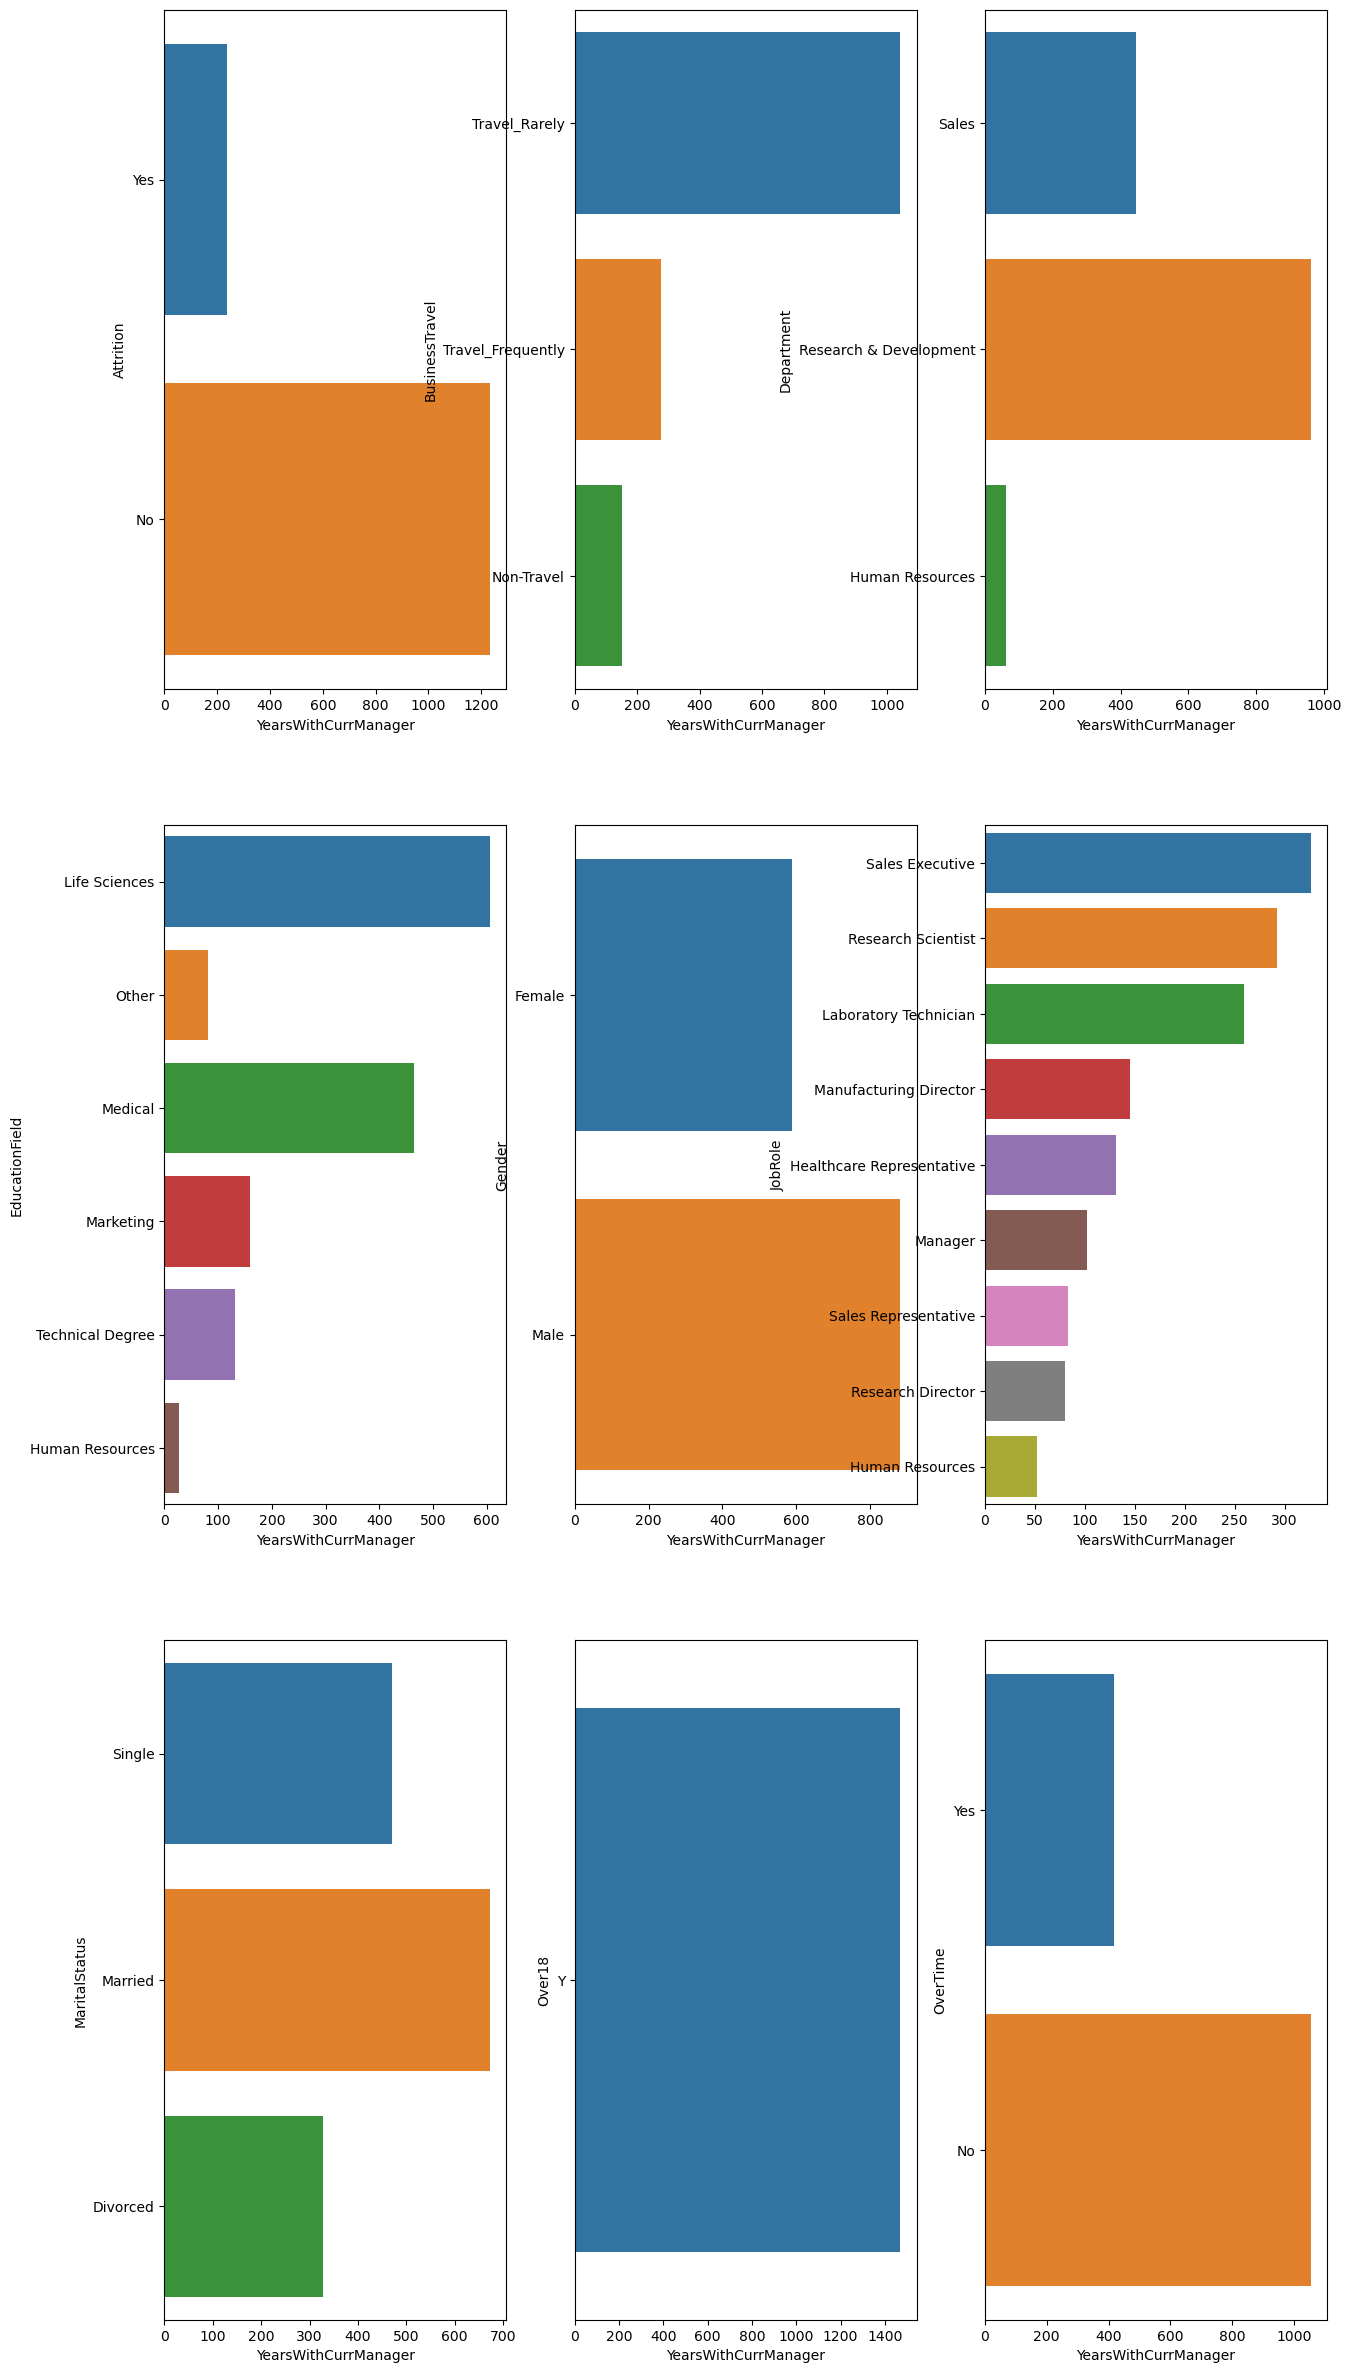

In [19]:
plt.figure(figsize=(15,30))
p = 1
for cats in cat_cols:
    
    if p<=9:
        plt.subplot(3,3,p)
        sns.countplot(y=cats,data=df)
        plt.xlabel(i)
        
    p+=1
plt.show()

In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [21]:
df[cat_cols] = df[cat_cols].apply(lambda x: label_encoder.fit_transform(x.astype(str)))

In [22]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,3,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,4,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,4,...,4,80,0,17,3,2,9,6,0,8


In [23]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

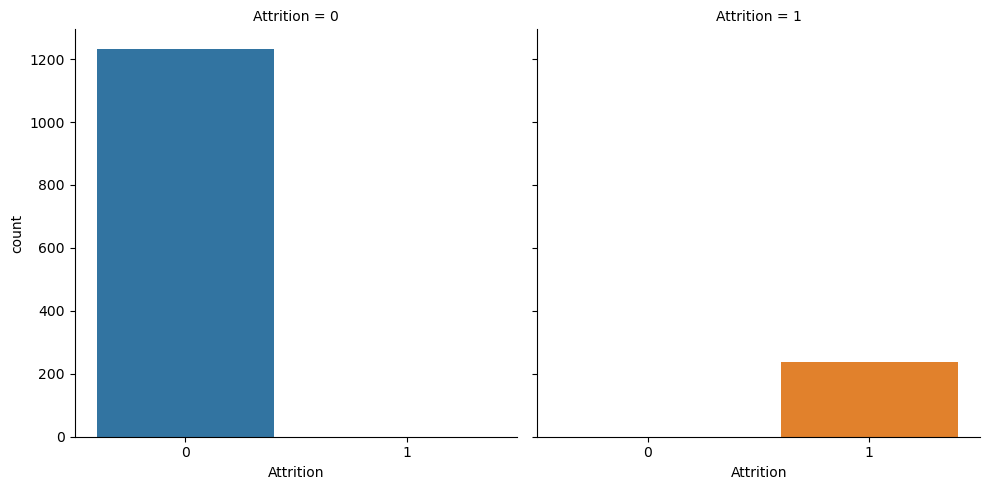

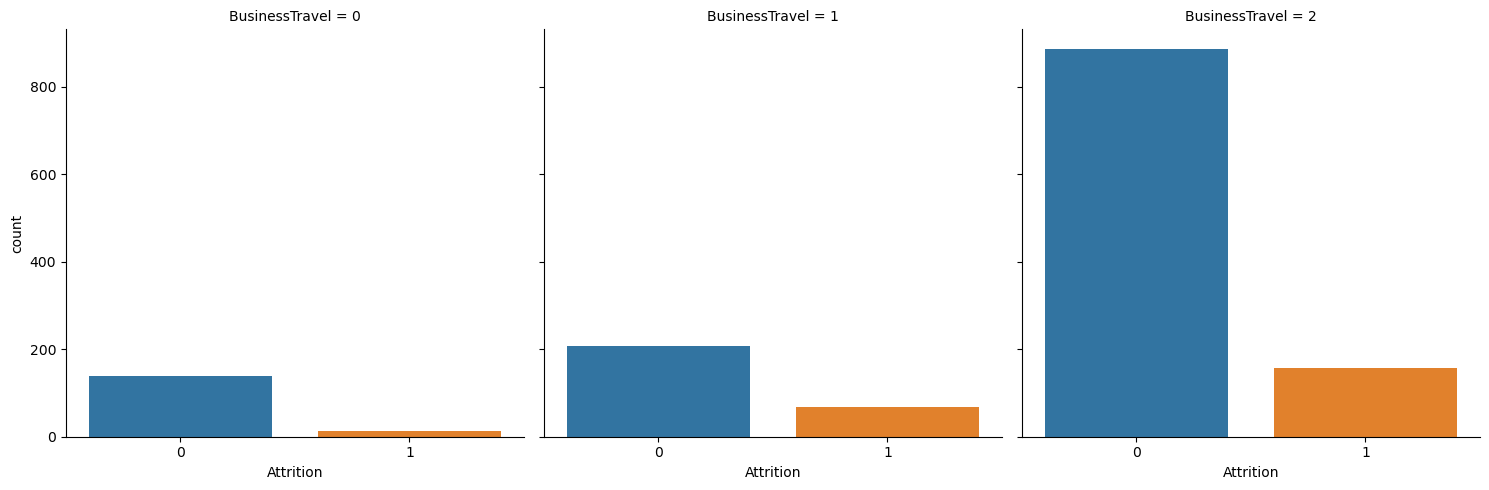

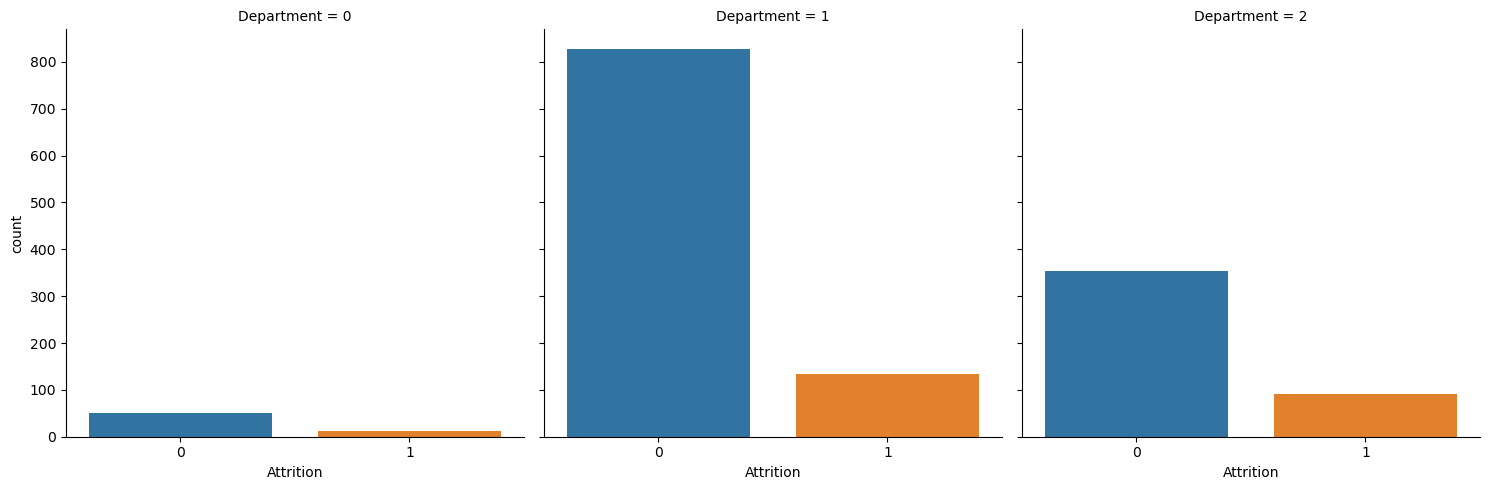

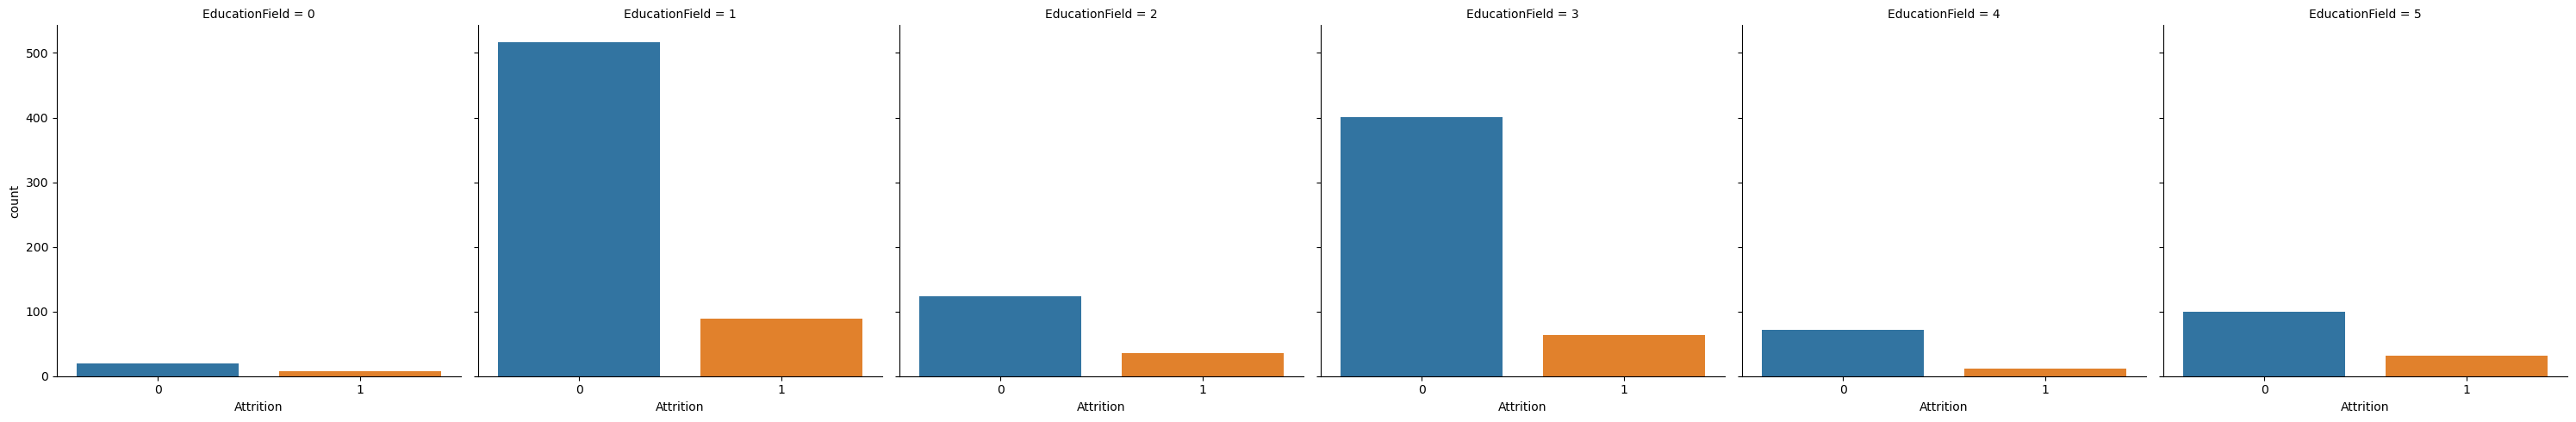

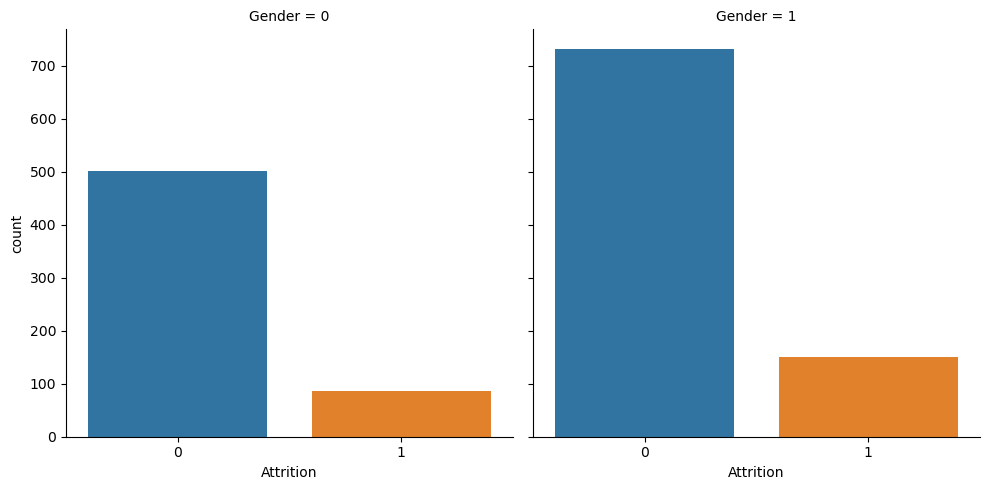

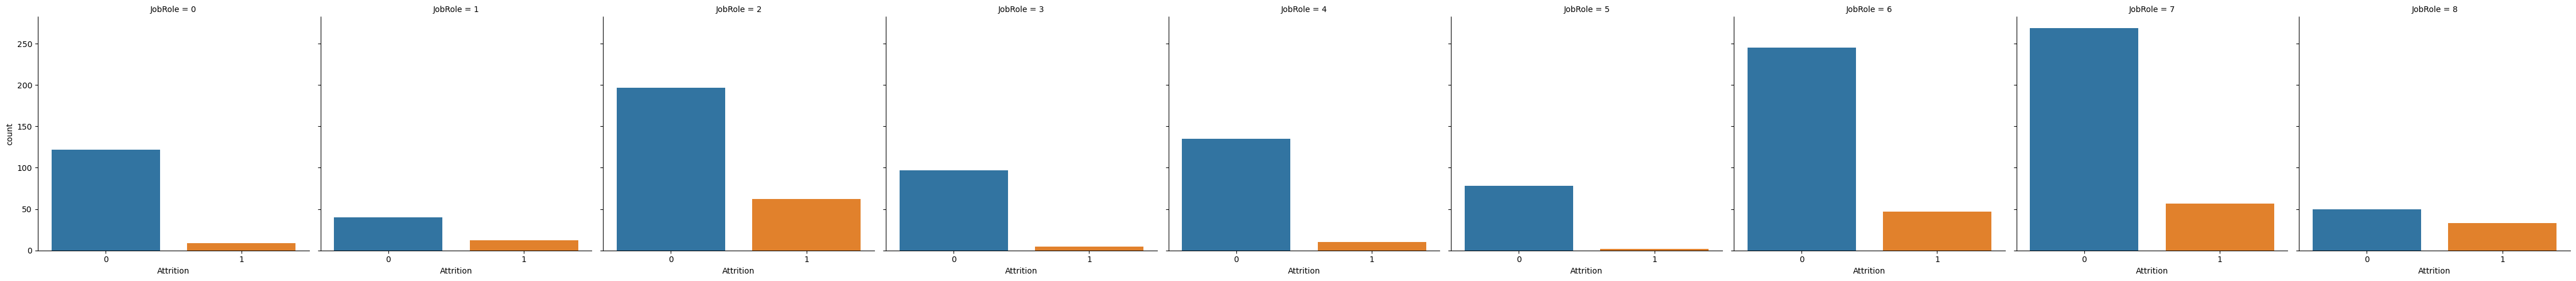

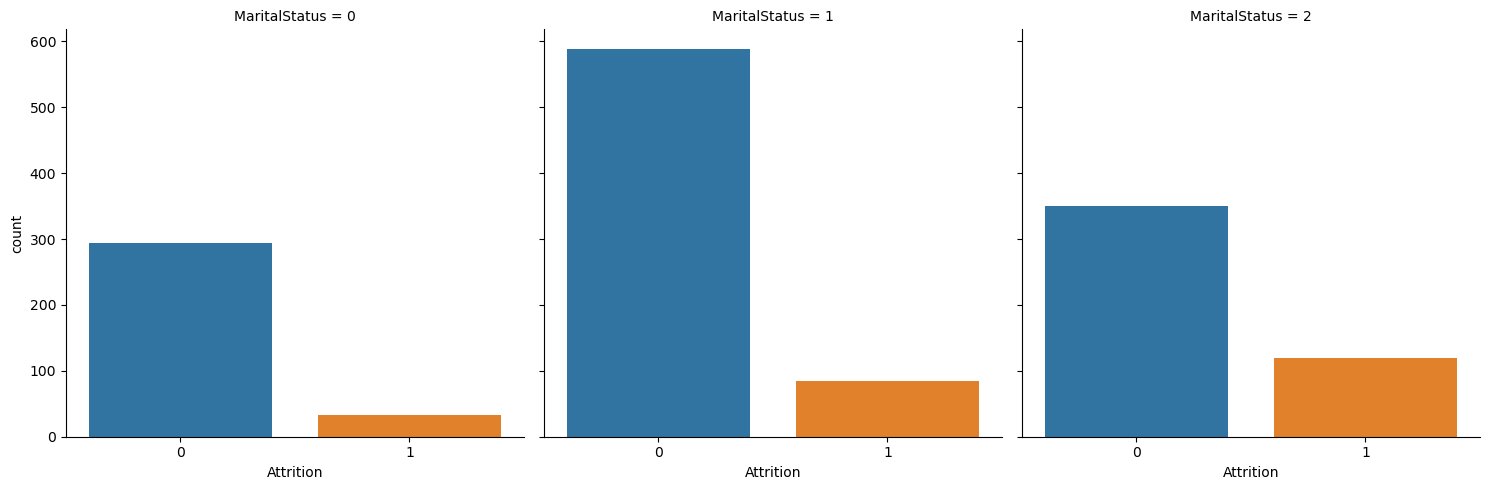

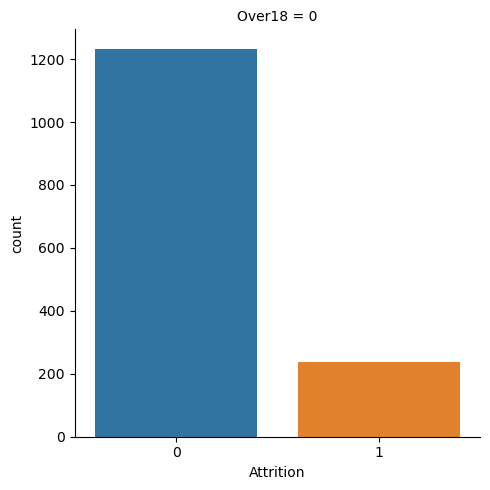

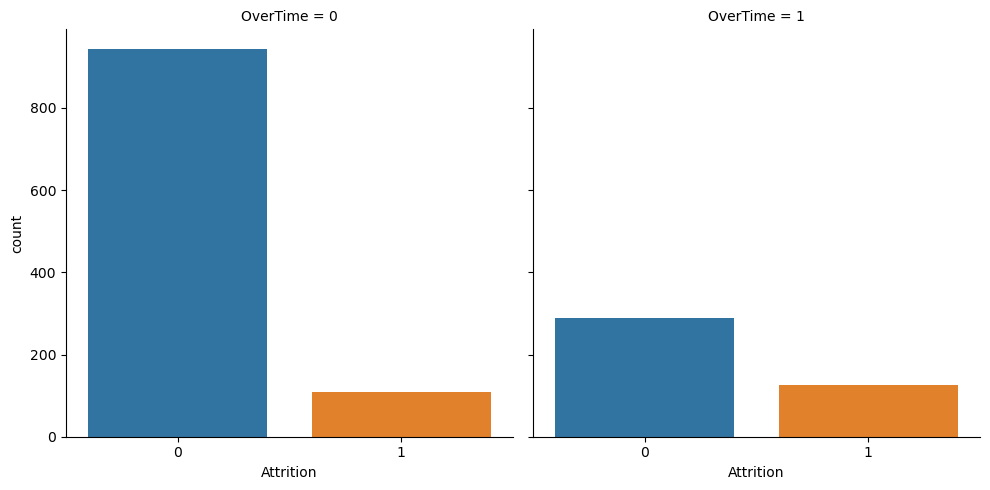

In [24]:
for cats in cat_cols:
    sns.catplot(x= 'Attrition',data = df,col=cats,kind='count')
    
plt.show()

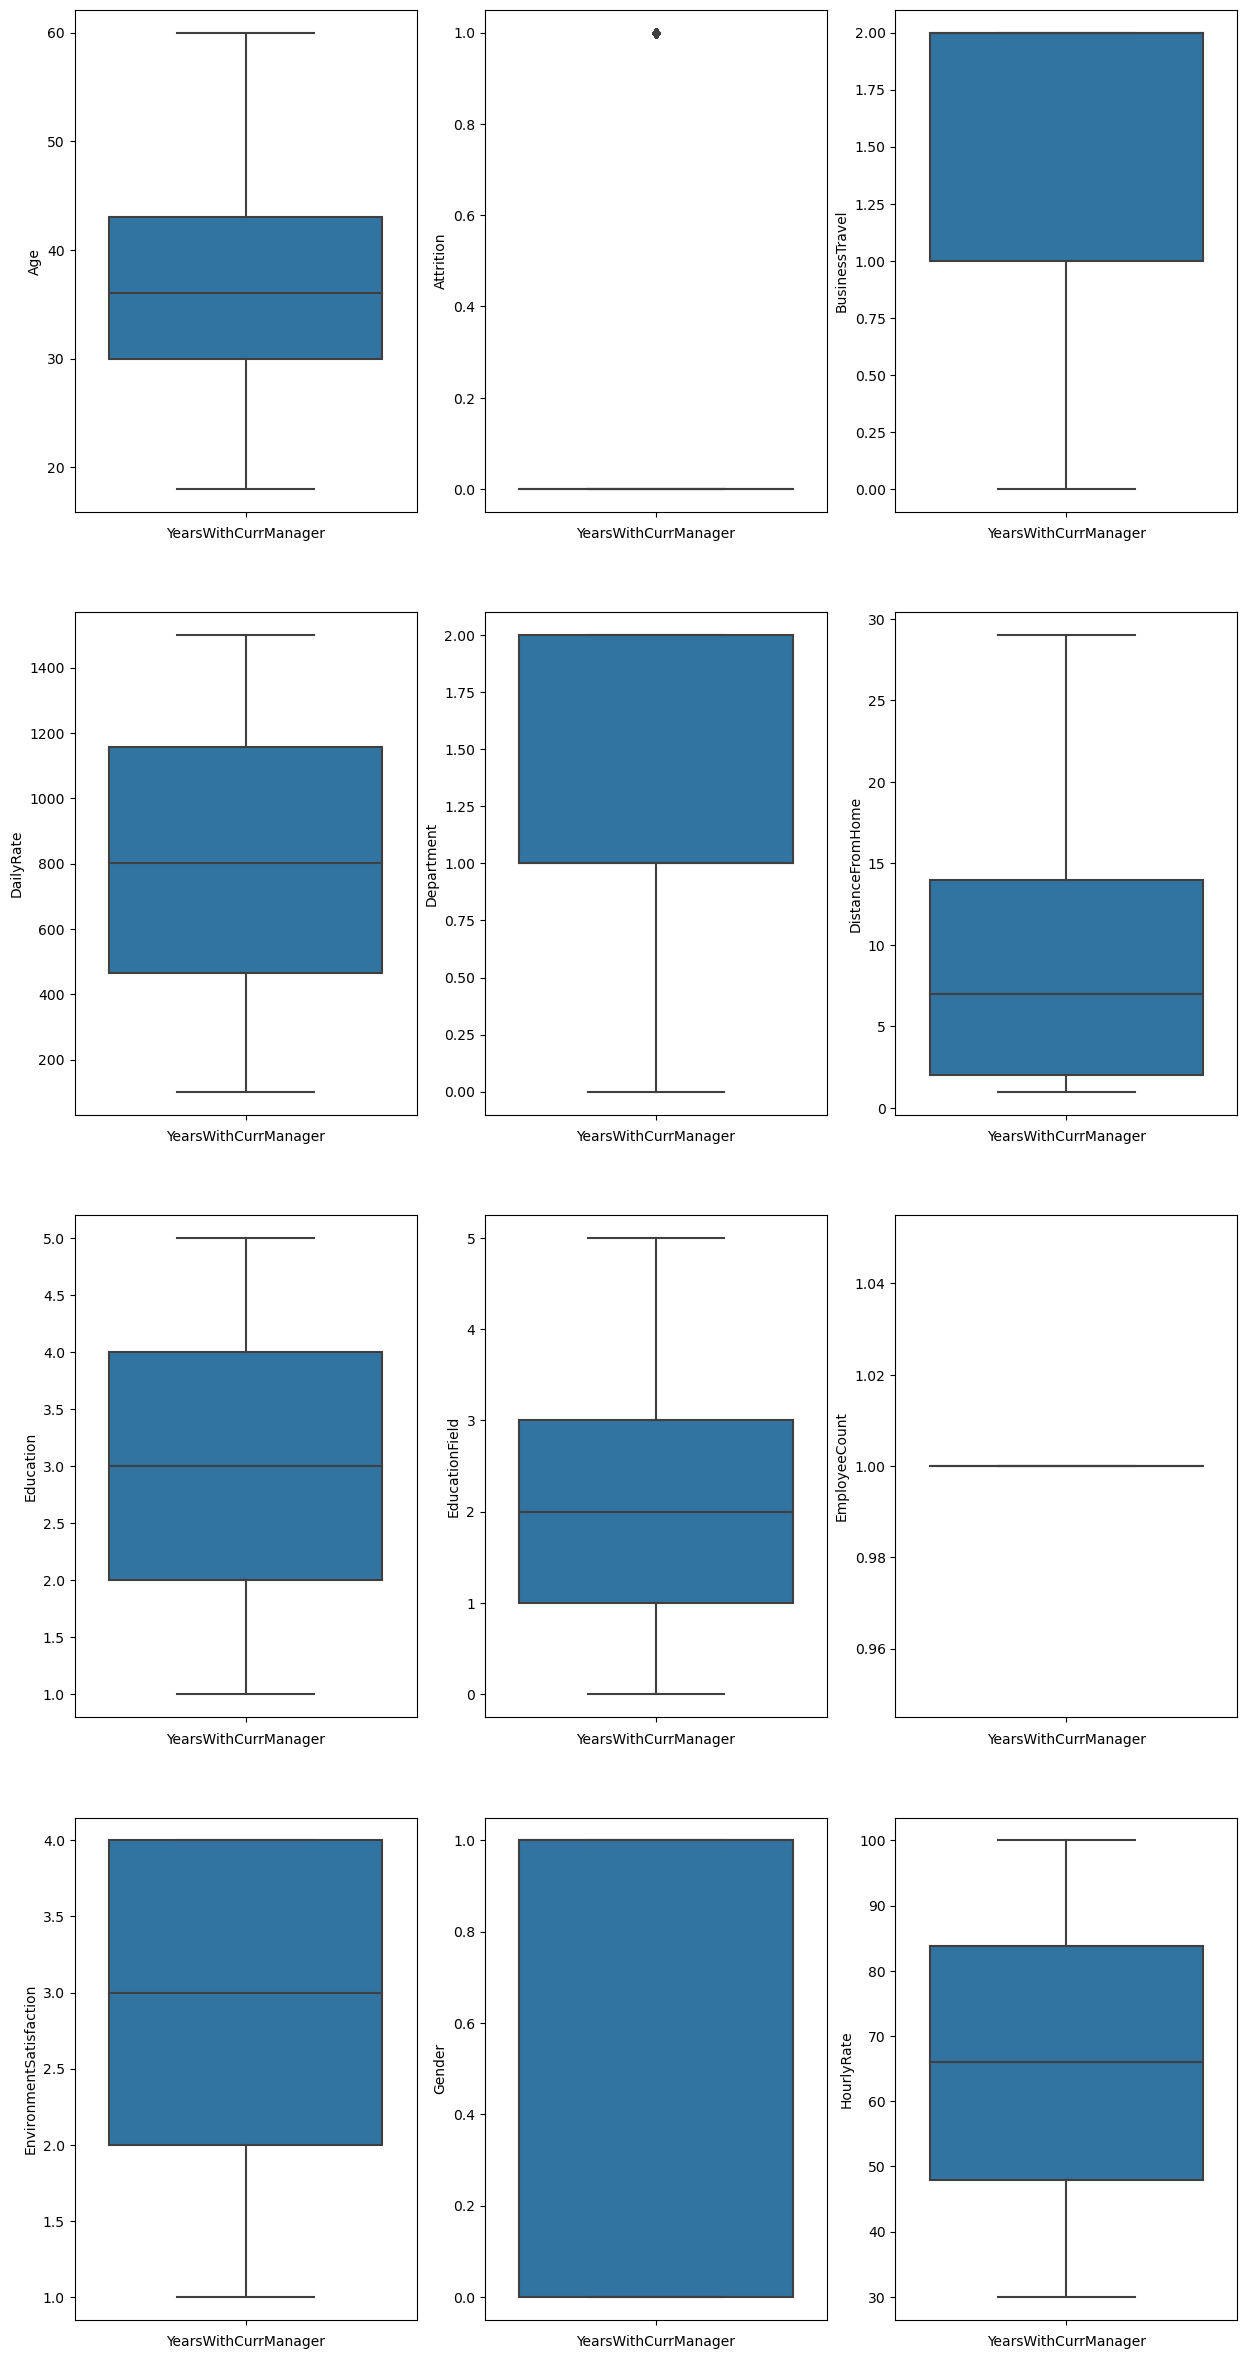

In [25]:
plt.figure(figsize=(15,30))
p = 1
for cats in df.columns:
    
    if p<=12:
        plt.subplot(4,3,p)
        sns.boxplot(y=cats,data=df)
        plt.xlabel(i)
        
    p+=1
plt.show()

In [26]:
#we have no mising data and outliers

In [27]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EmployeeCount               0.000000
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
NumCompaniesWorked          1.026471
Over18                      0.000000
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
W

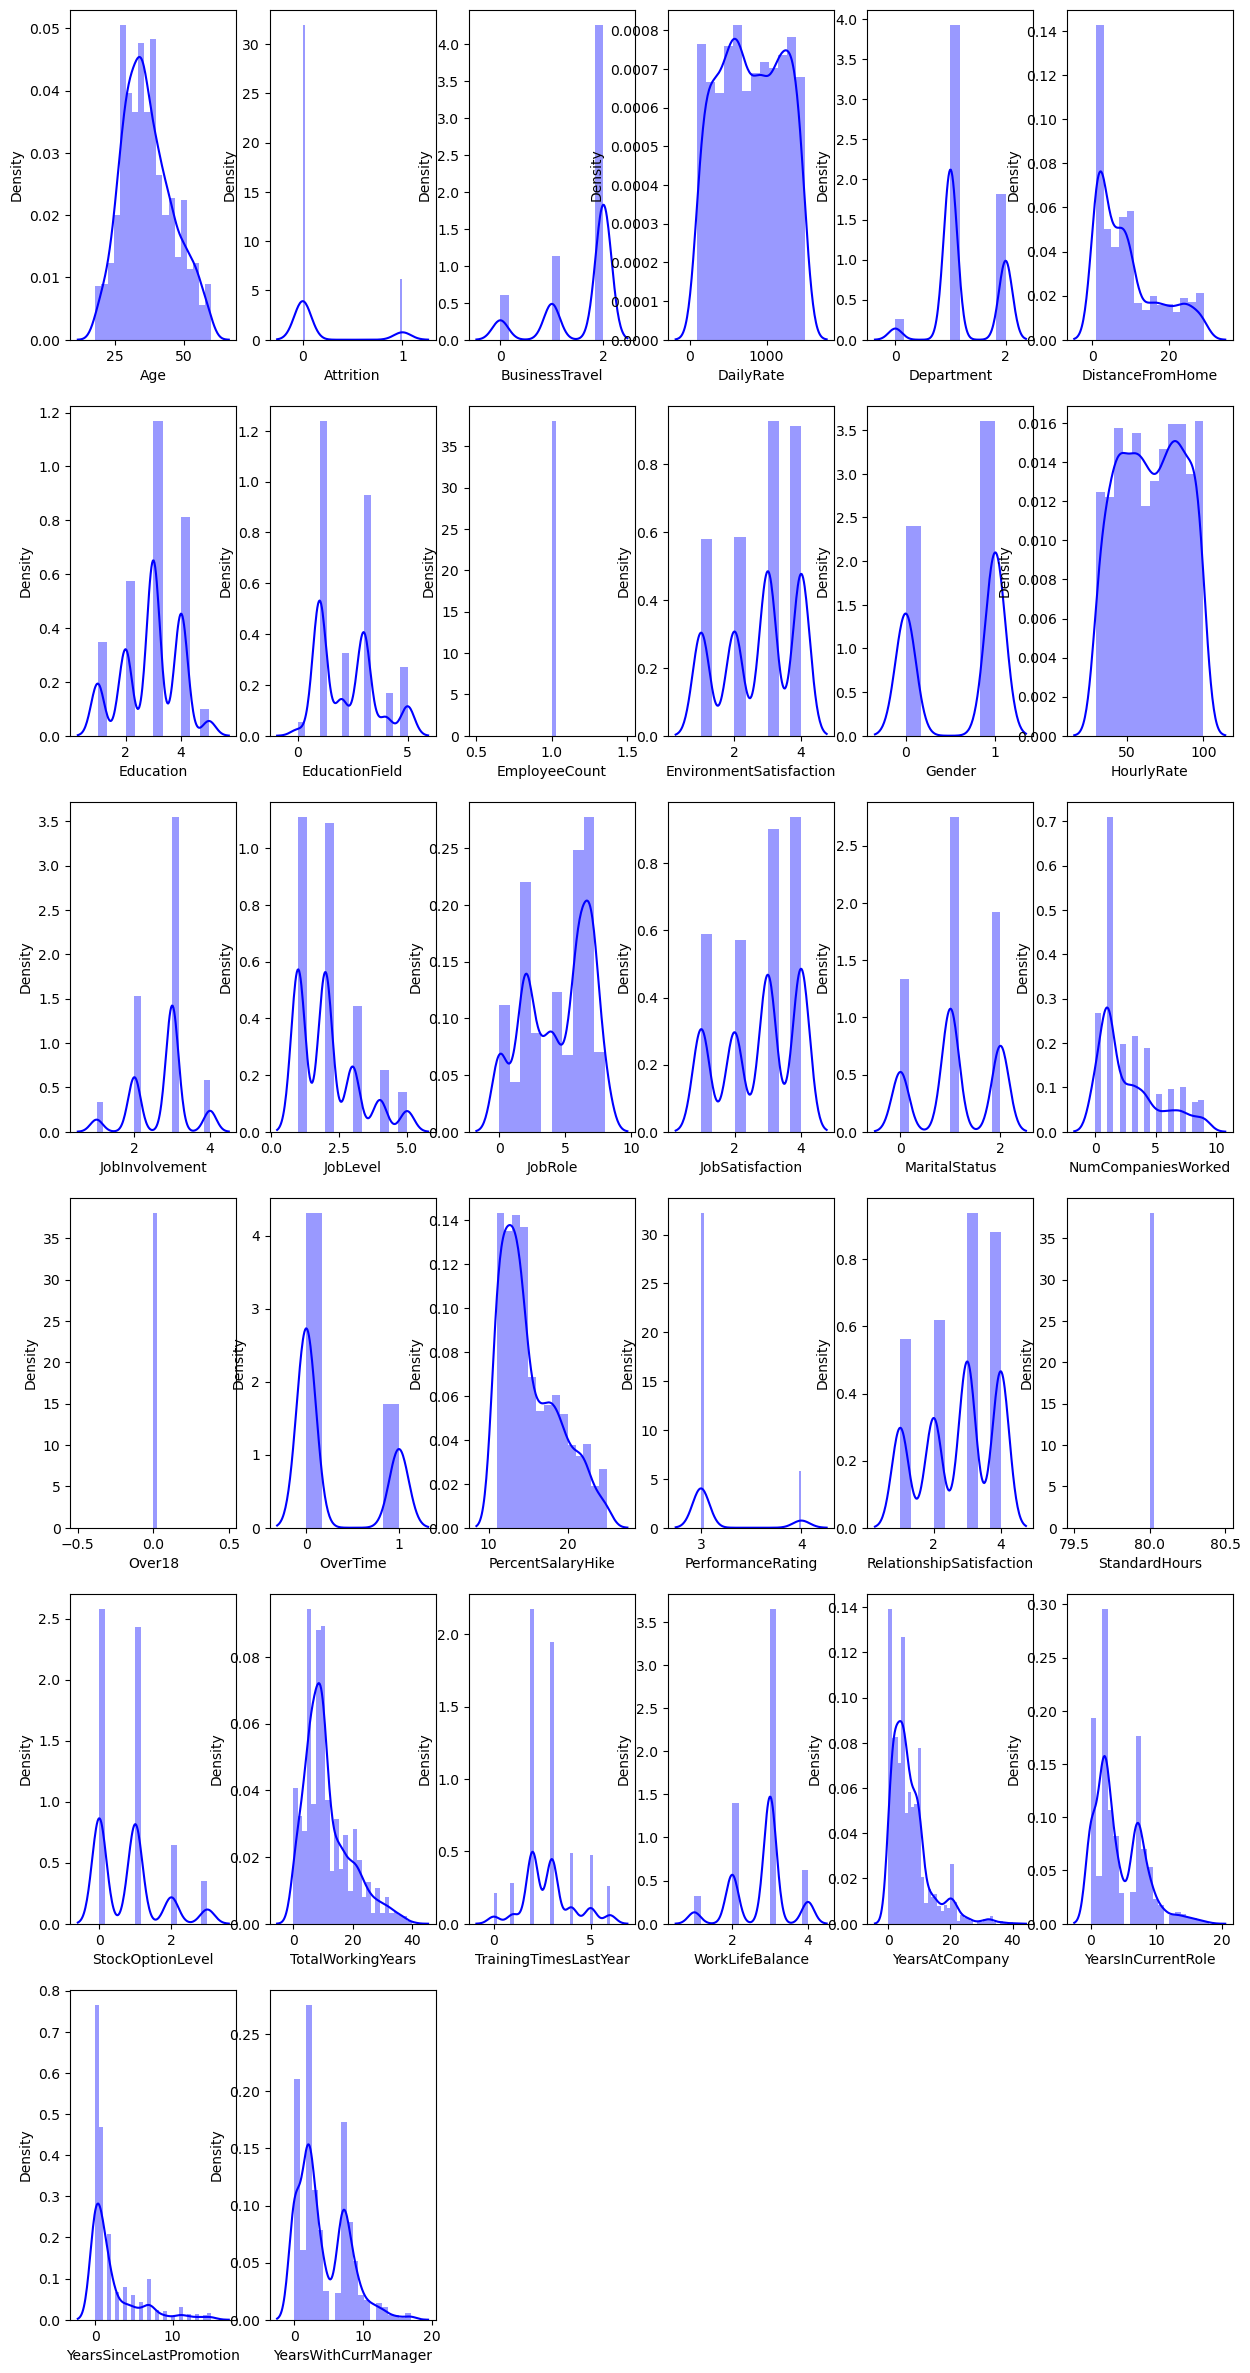

In [28]:
plt.figure(figsize=(15,30))
p = 1
for i in df:
    
    if p<=36:
        plt.subplot(6,6,p)
        sns.distplot(df[i], color='blue')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [29]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: >

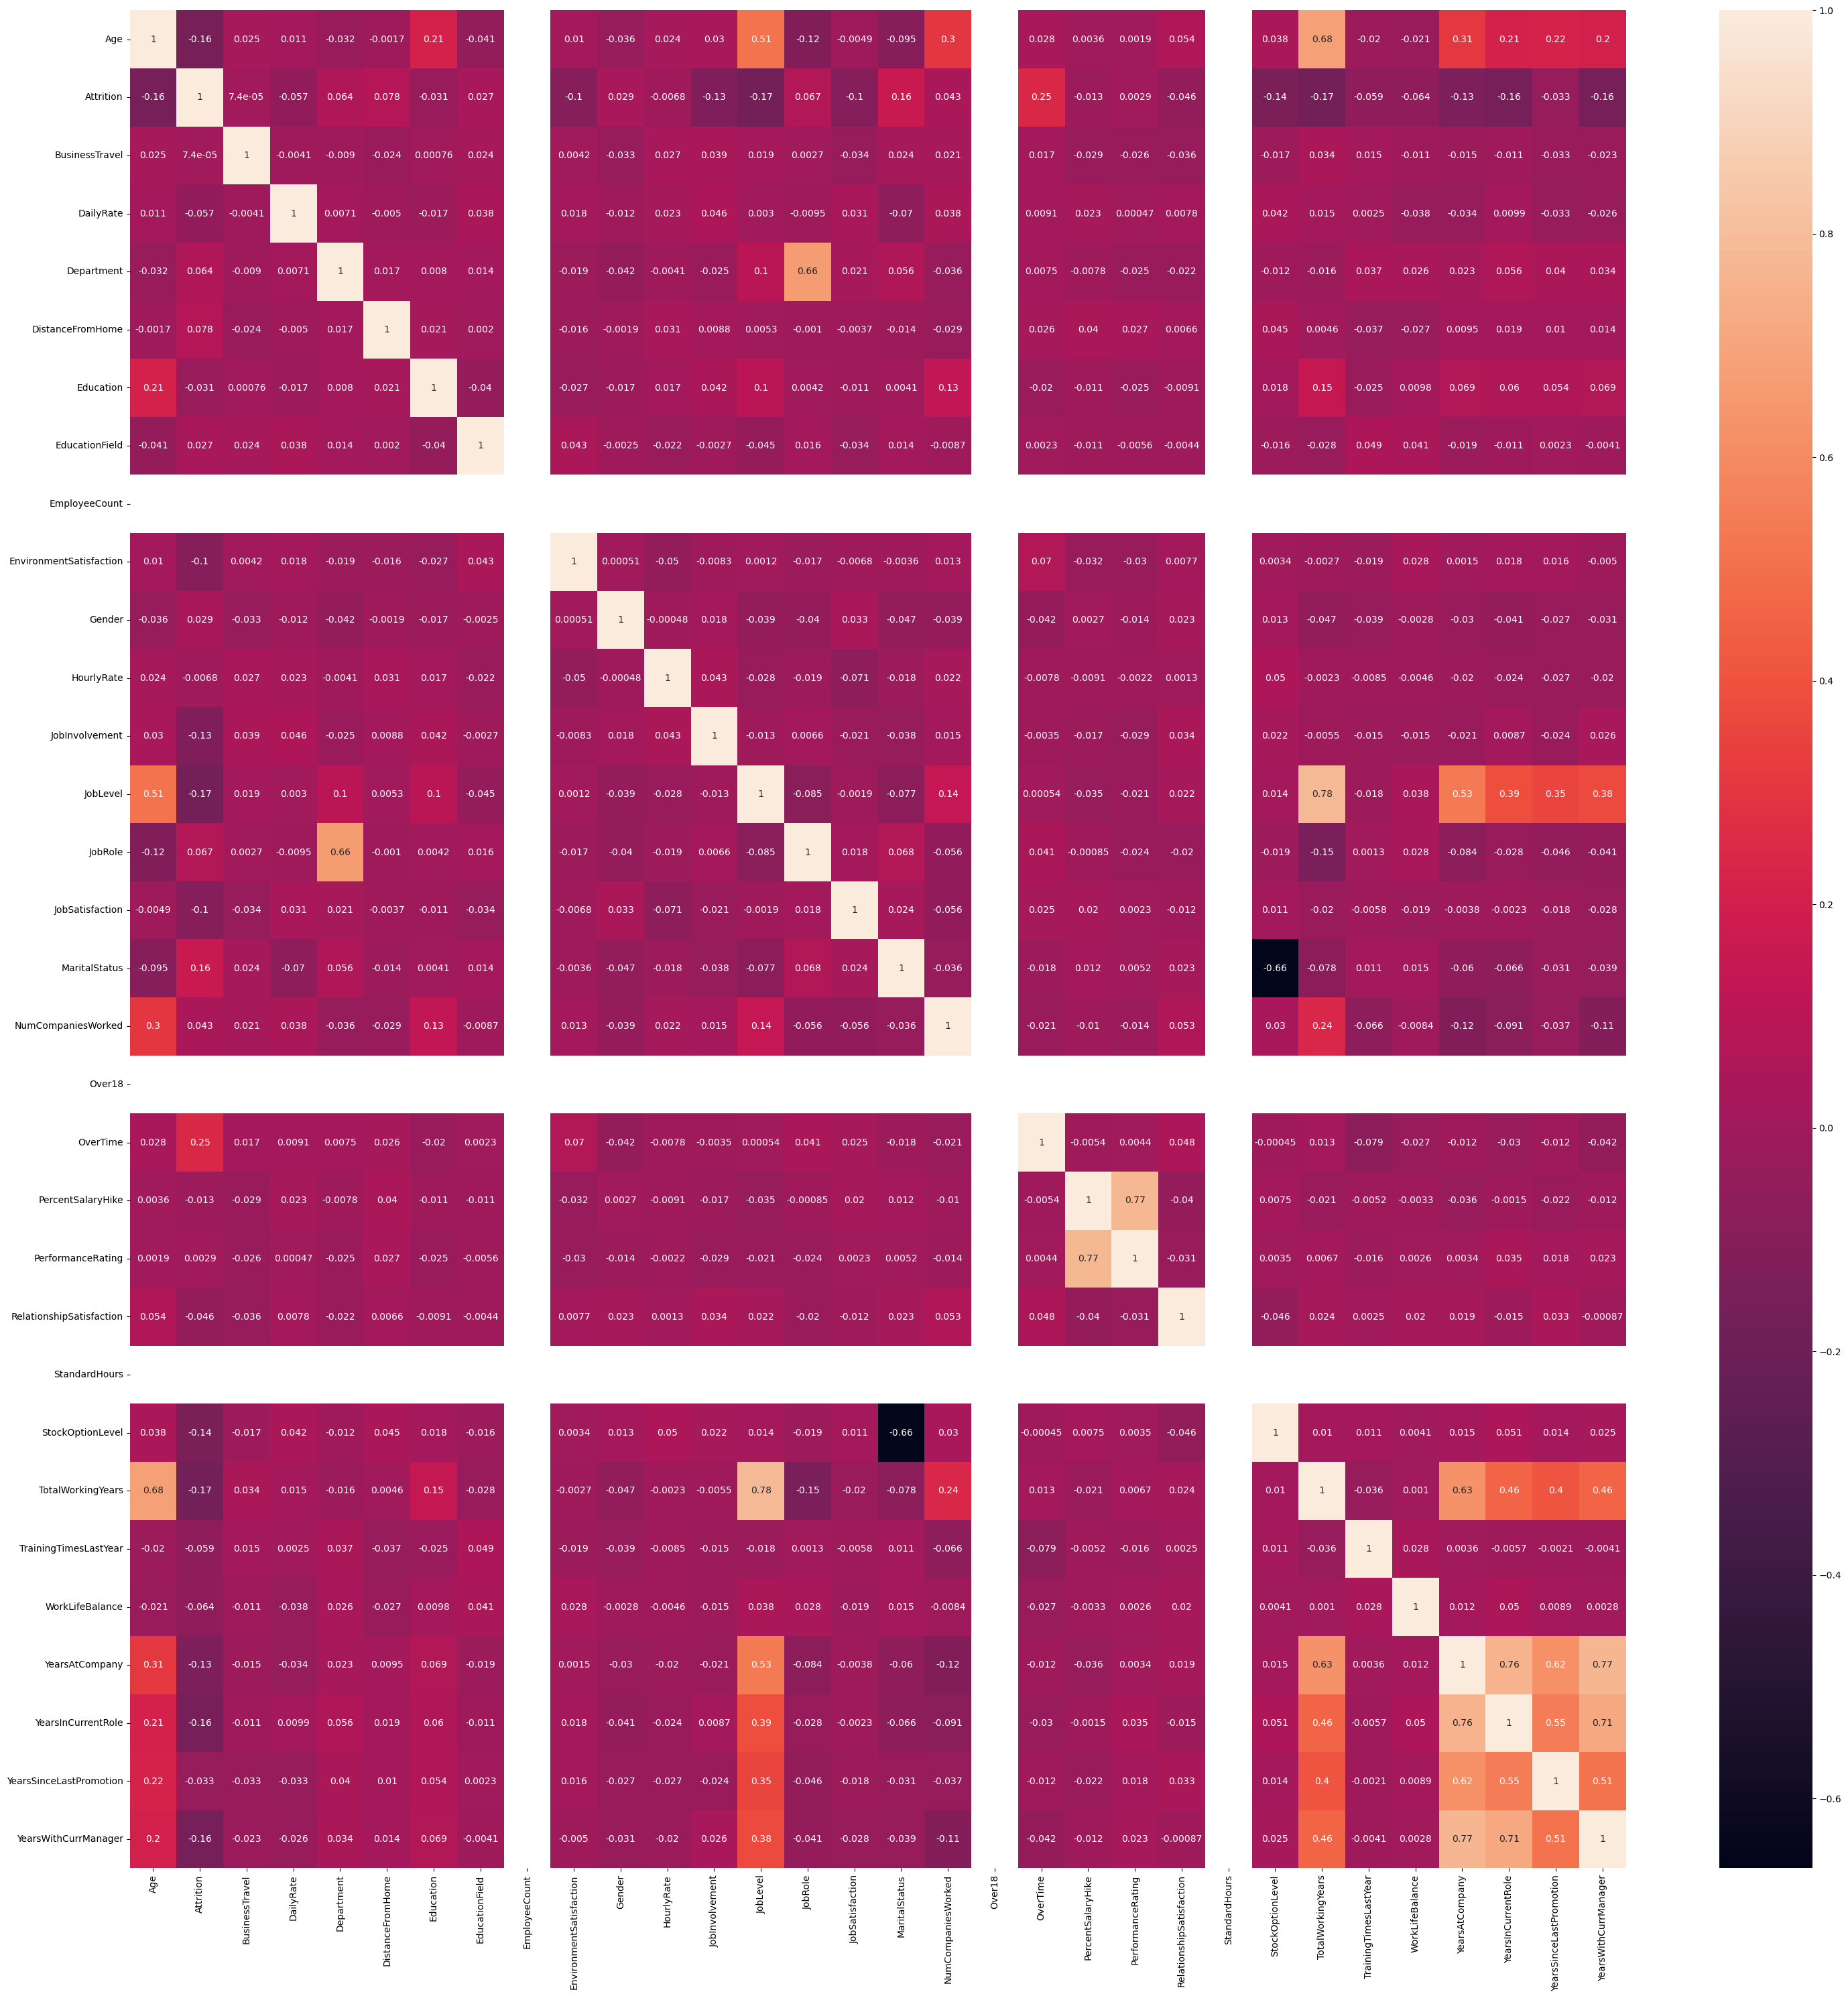

In [30]:
plt.figure(figsize=(36,36))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

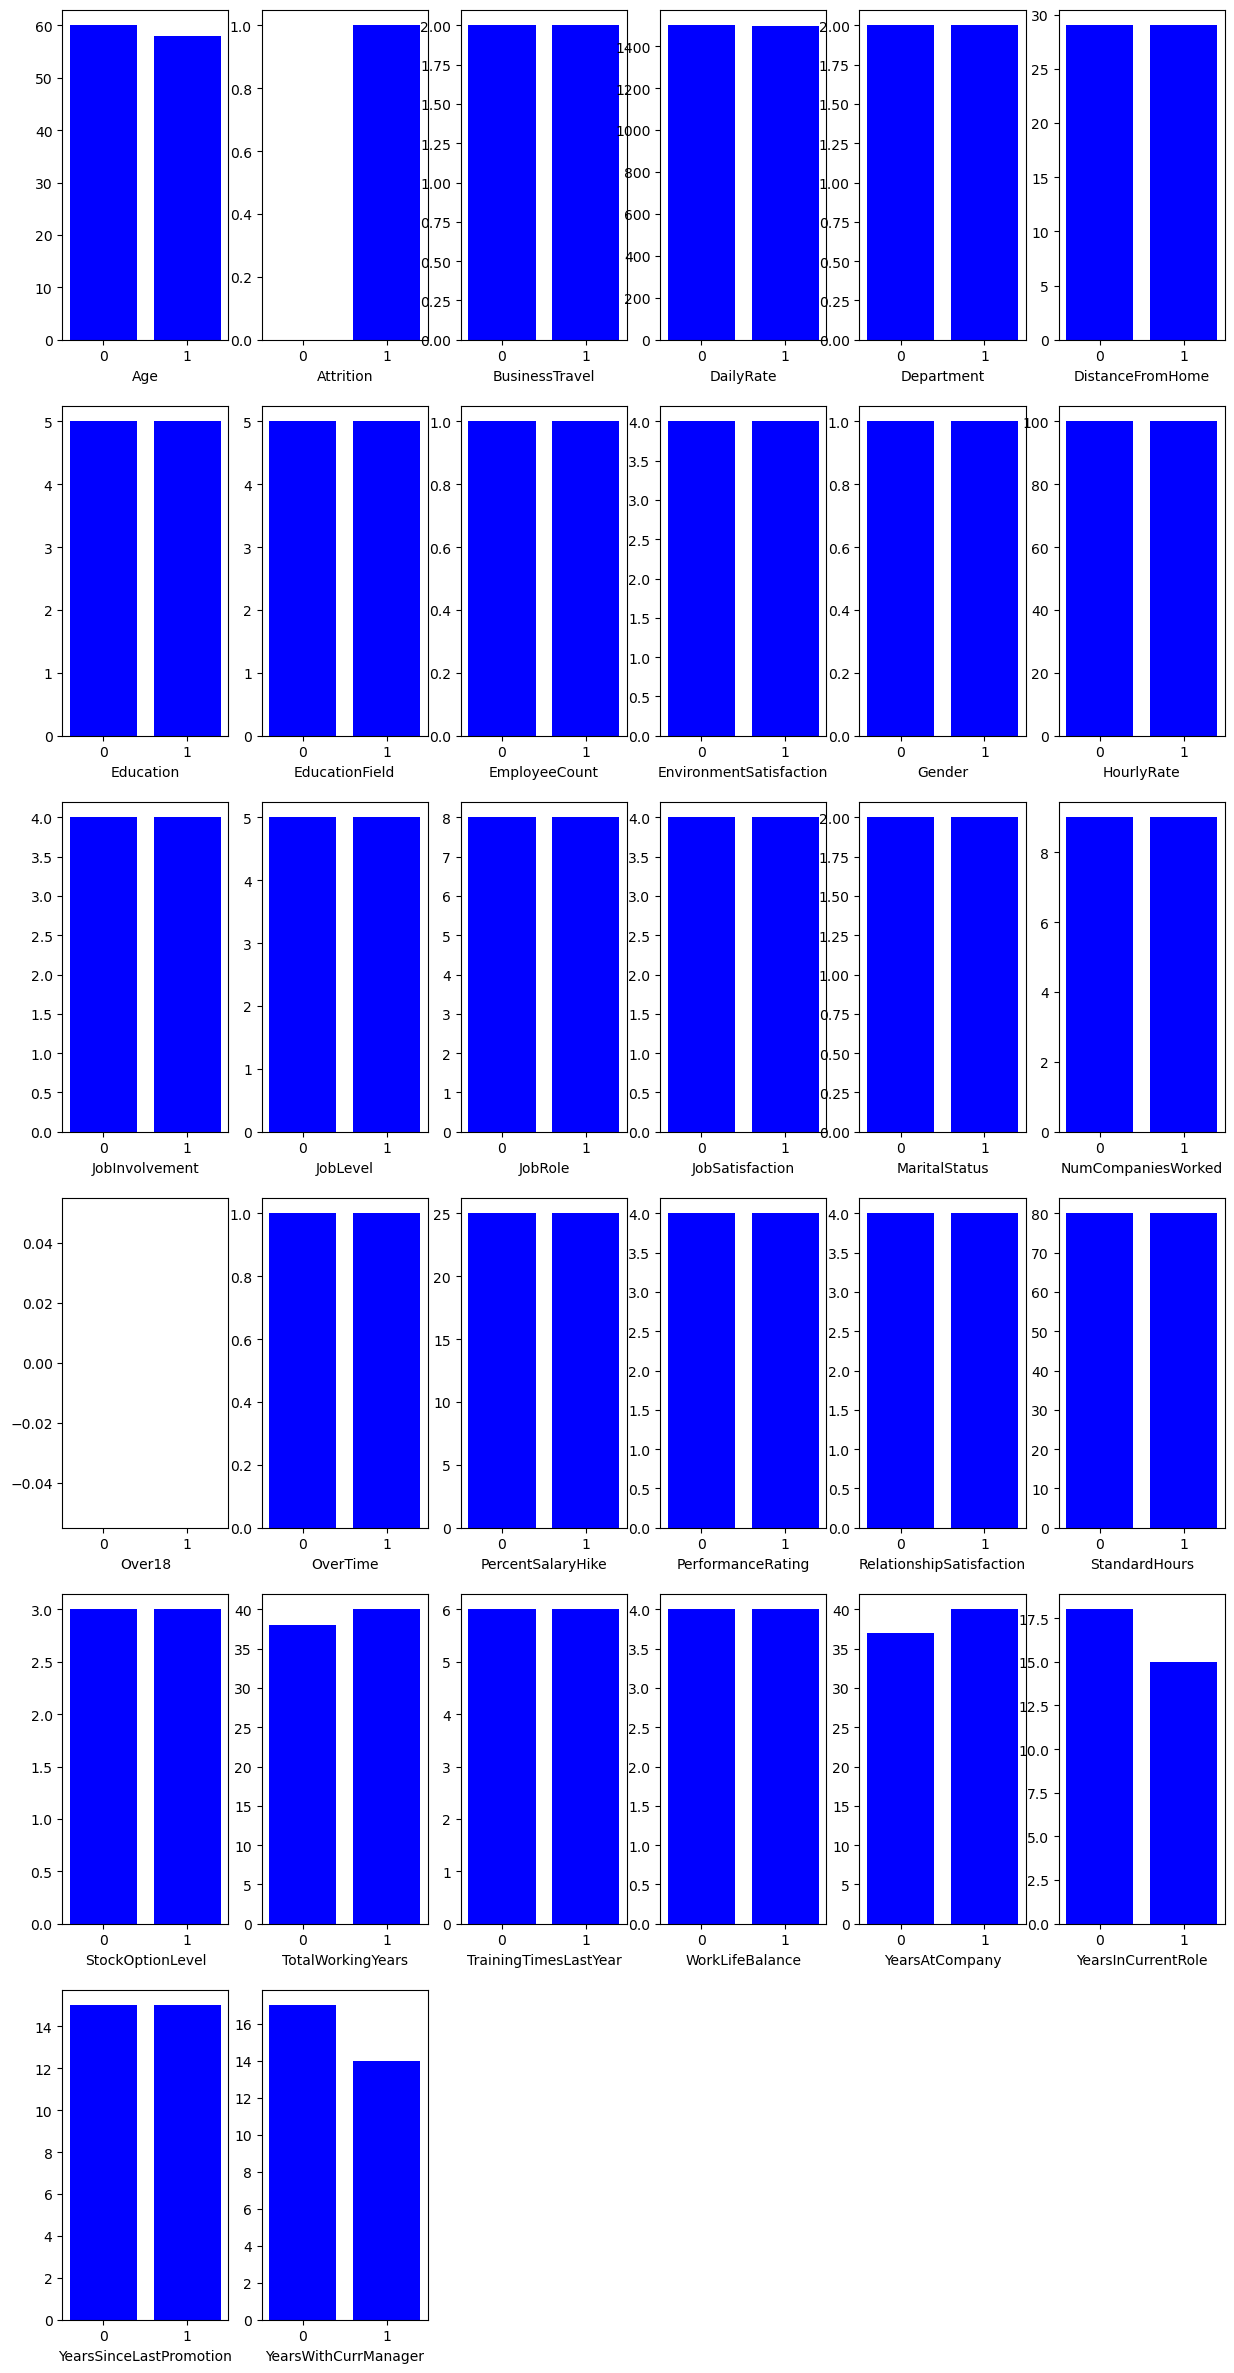

In [31]:
plt.figure(figsize=(15,30))
p = 1
for i in df:
    
    if p<=36:
        plt.subplot(6,6,p)
        plt.bar(df['Attrition'],df[i], color='blue')
        plt.xlabel(i)
        
    p+=1
plt.show()

In [32]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

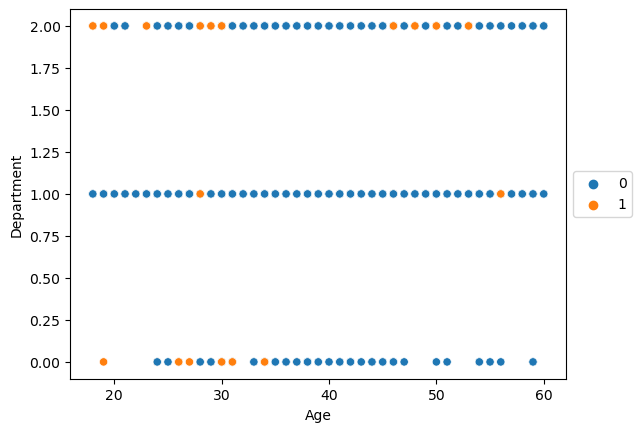

In [33]:
sns.scatterplot( x='Age',y='Department',hue='Attrition',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

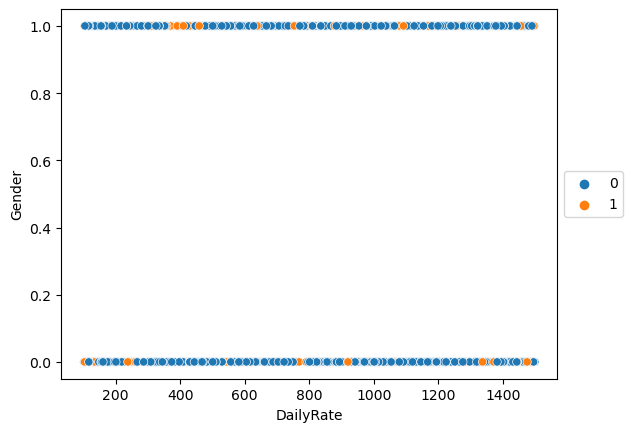

In [34]:
sns.scatterplot( x='DailyRate',y='Gender',hue='Attrition',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

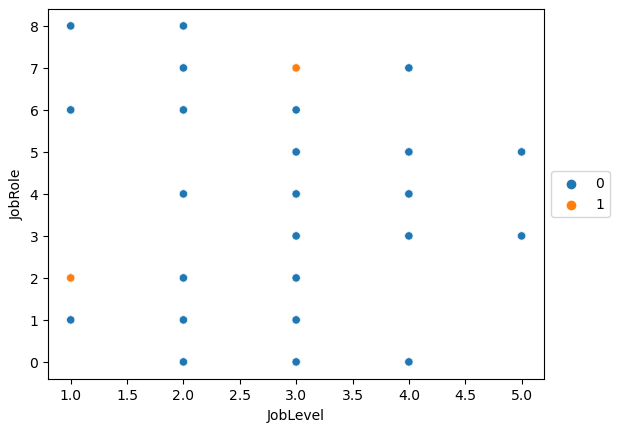

In [35]:
sns.scatterplot( x='JobLevel',y='JobRole',hue='Attrition',data=df)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [36]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
VIF = pd.DataFrame()

In [39]:
VIF['VIF values'] = [variance_inflation_factor(X.values,i)
                    for i in range(len(X.columns))]
VIF['features'] = X.columns
VIF

,VIF values,features
0,2.049210,Age
1,1.014208,BusinessTravel
2,1.022581,DailyRate
3,1.903727,Department
4,1.011417,DistanceFromHome
5,1.062265,Education
6,1.015406,EducationField
7,0.000000,EmployeeCount
8,1.015479,EnvironmentSatisfaction
9,1.017484,Gender


In [40]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [41]:
#need to solve solve imbalanced data

In [42]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X,y = smote.fit_resample(X, y)

In [43]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,f1_score,recall_score

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
Scaler =  StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test)

In [47]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test,predictions)

0.8452088452088452

In [48]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       417
           1       0.83      0.85      0.84       397

    accuracy                           0.85       814
   macro avg       0.85      0.85      0.85       814
weighted avg       0.85      0.85      0.85       814



In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [51]:
maxaccu = 0
maxrs = 0

for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=i)
    LR = LogisticRegression()
    LR.fit(X_train,y_train)
    predictions = LR.predict(X_test)
    acc=accuracy_score(y_test,predictions)
    if acc>maxaccu:
        maxaccu=acc
        maxrs =i
print('max acc is',maxaccu,'on r state',maxrs)

max acc is 0.8574938574938575 on r state 85


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=maxrs)

In [54]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
accuracy_score(y_test,predictions)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
accuracy_score(y_test,predictions)

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       396
           1       0.87      0.84      0.86       418

    accuracy                           0.86       814
   macro avg       0.86      0.86      0.86       814
weighted avg       0.86      0.86      0.86       814

[[345  51]
 [ 65 353]]


0.8574938574938575

In [55]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
accuracy_score(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.54      0.61      0.57       396
           1       0.58      0.51      0.55       418

    accuracy                           0.56       814
   macro avg       0.56      0.56      0.56       814
weighted avg       0.56      0.56      0.56       814

[[241 155]
 [203 215]]


0.5601965601965602

In [56]:
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier()
classifier1.fit(X_train, y_train)
y_pred1 = classifier1.predict(X_test)
accuracy_score(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
accuracy_score(y_test,y_pred1)

              precision    recall  f1-score   support

           0       0.90      0.57      0.70       396
           1       0.70      0.94      0.80       418

    accuracy                           0.76       814
   macro avg       0.80      0.75      0.75       814
weighted avg       0.79      0.76      0.75       814

[[226 170]
 [ 26 392]]


0.7592137592137592

In [57]:
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
accuracy_score(y_test,y_pred2 )
print(classification_report(y_test,y_pred2 ))
print(confusion_matrix(y_test,y_pred2 ))
accuracy_score(y_test,y_pred2)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       396
           1       0.81      0.85      0.83       418

    accuracy                           0.82       814
   macro avg       0.82      0.82      0.82       814
weighted avg       0.82      0.82      0.82       814

[[313  83]
 [ 64 354]]


0.8194103194103194

In [58]:
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier()
classifier3.fit(X_train, y_train)
y_pred3 = classifier3.predict(X_test)
accuracy_score(y_test,y_pred3 )
print(classification_report(y_test,y_pred3 ))
print(confusion_matrix(y_test,y_pred3))
accuracy_score(y_test,y_pred3)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91       396
           1       0.95      0.86      0.90       418

    accuracy                           0.90       814
   macro avg       0.91      0.91      0.90       814
weighted avg       0.91      0.90      0.90       814

[[376  20]
 [ 58 360]]


0.9041769041769042

In [59]:
from xgboost import XGBClassifier
classifier4 = XGBClassifier()
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)
accuracy_score(y_test, y_pred4)
print(confusion_matrix(y_test,y_pred4))
print(classification_report(y_test,y_pred4))
accuracy_score(y_test,y_pred4)

[[366  30]
 [ 49 369]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       396
           1       0.92      0.88      0.90       418

    accuracy                           0.90       814
   macro avg       0.90      0.90      0.90       814
weighted avg       0.90      0.90      0.90       814



0.902948402948403

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

In [61]:
classifier3.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [62]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [64]:
grid_search = GridSearchCV(classifier3, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [65]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [66]:
best_params

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [67]:
best_model

RandomForestClassifier(bootstrap=False, n_estimators=300)

In [68]:
y_pred11 = best_model.predict(X_test)  

In [69]:
accuracy = accuracy_score(y_test, y_pred11)
print("Accuracy:", accuracy)

Accuracy: 0.9066339066339066


In [72]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred11)
fpr, tpr, thresholds

(array([0.        , 0.05808081, 1.        ]),
 array([0.        , 0.87320574, 1.        ]),
 array([2, 1, 0]))

In [73]:
auc_value = auc(fpr, tpr)
auc_value

0.9075624667729931

In [74]:
print("Best Hyperparameters:", best_params)
print("AUC:", auc_value)

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
AUC: 0.9075624667729931


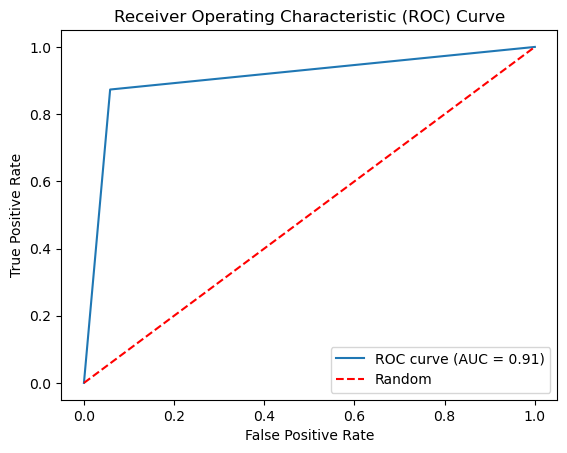

In [75]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], linestyle='--', color='r', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [78]:
md = pd.DataFrame({'all m':['logmodel','classifier','classifier1','classifier2','classifier3','classifier4','best_model'],
             'acc score' :[accuracy_score(y_test,predictions)*100,
                         accuracy_score(y_test, y_pred)*100,
                         accuracy_score(y_test, y_pred1)*100,
                         accuracy_score(y_test, y_pred2)*100,
                         accuracy_score(y_test, y_pred3)*100,
                         accuracy_score(y_test, y_pred4)*100,
                         accuracy_score(y_test, y_pred11)*100]})

<Axes: xlabel='all m', ylabel='acc score'>

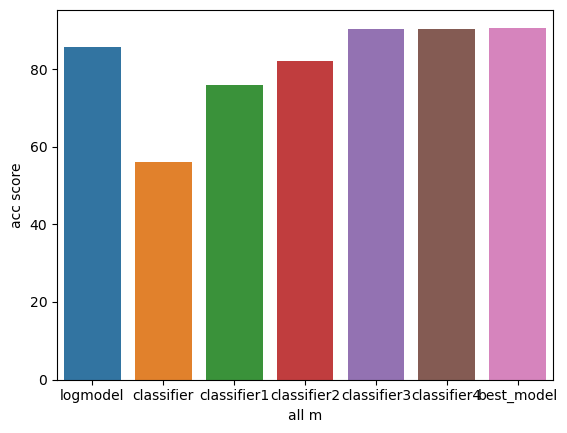

In [83]:
sns.barplot(x='all m',y='acc score',data = md)

In [84]:
import joblib

In [85]:
joblib.dump(best_model,'HR Analytics')

['HR Analytics']